## 📚import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



###  📄Loading data

In [5]:
train_df = pd.read_csv('playground-series/train.csv')
test  = pd.read_csv('playground-series/test.csv')
df_sub = pd.read_csv('playground-series/sample_submission.csv')

In [6]:
original = pd.read_csv('credit_risk_dataset.csv')

In [7]:
original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 🔍️explore data 

In [8]:
def discovering_data(df):
    print(f'Number of variables: {df.shape[1]}')
    print(f'Number of observations: {df.shape[0]}')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(f'Missing cells: {df.isnull().sum().sum()}')
    print(f'Numeric values: {len(df.select_dtypes(include=np.number).columns)}')
    print(f'Categorical values: {len(df.select_dtypes(include="O").columns)}')


In [9]:
 discovering_data(train_df)

Number of variables: 13
Number of observations: 58645
Number of duplicates: 0
Missing cells: 0
Numeric values: 9
Categorical values: 4


In [10]:
discovering_data(test)

Number of variables: 12
Number of observations: 39098
Number of duplicates: 0
Missing cells: 0
Numeric values: 8
Categorical values: 4


In [11]:
 discovering_data(original)

Number of variables: 12
Number of observations: 32581
Number of duplicates: 165
Missing cells: 4011
Numeric values: 8
Categorical values: 4


In [12]:
train_df=pd.concat([train_df,original],axis=0)

In [13]:
train_df=train_df.drop_duplicates()

In [14]:
train_df = train_df.drop(columns=['id'])

In [15]:
test_df = test.drop(columns=['id'])

In [16]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int64  
 1   person_income               91061 non-null  int64  
 2   person_home_ownership       91061 non-null  object 
 3   person_emp_length           90174 non-null  float64
 4   loan_intent                 91061 non-null  object 
 5   loan_grade                  91061 non-null  object 
 6   loan_amnt                   91061 non-null  int64  
 7   loan_int_rate               87966 non-null  float64
 8   loan_percent_income         91061 non-null  float64
 9   cb_person_default_on_file   91061 non-null  object 
 10  cb_person_cred_hist_length  91061 non-null  int64  
 11  loan_status                 91061 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [18]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91061.0,27.620683,6.150047,20.00,23.00,26.00,30.00,144.00
person_income,91061.0,64774.320917,47922.855155,4000.00,40000.00,57000.00,78000.00,6000000.00
person_emp_length,90174.0,4.732306,4.025893,0.00,2.00,4.00,7.00,123.00
loan_amnt,91061.0,9351.508352,5848.017127,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,87966.0,10.791001,3.109323,5.42,7.88,10.95,13.11,23.22
loan_percent_income,91061.0,0.163158,0.097486,0.00,0.09,0.14,0.22,0.83
cb_person_cred_hist_length,91061.0,5.812752,4.039820,2.00,3.00,4.00,8.00,30.00
loan_status,91061.0,0.169546,0.375235,0.00,0.00,0.00,0.00,1.00



**<ins> Summary Statistics Insights: </ins>**

**Person Age:**
- Mean: 27.61 years.
- Range: 20 to 144 years.

**Person Income:**
- Mean: $64,770.70.
- Range: $4,000 to $6,000,000.

**Person Employment Length:**
- Mean: 4.73 years.
- Range: 0 to 123 years.

**Loan Amount:**
- Mean: $9,350.34.
- Range: $500 to $35,000.

**Loan Interest Rate:**
- Mean: 10.78%.
- Range: 5.42% to 23.22%.

**Loan Percent Income:**
- Mean: 0.163 (16.3% of income).
- Range: 0 to 0.83.

**Credit History Length:**
- Mean: 5.81 years.
- Range: 2 to 30 years.

**Loan Status:**
- Mean: 0.169 (proportion of approved loans).
- Range: binary (0 or 1).

**<ins>Key Insights:</ins>**

1. Income Disparity: Significant difference in income levels may impact loan approval decisions.

2. Outliers: Presence of outliers in age and employment length may need to be addressed.

3. Loan Amounts: Most loans are relatively small, with a mean of around $9,350.

4. Interest Rates: Average interest rate is around 10.78%, with a wide range indicating varying risk levels.

5. Credit History: Average credit history length is about 5.81 years, a critical factor in loan approval.

In [19]:
train_df[(train_df["person_age"]>100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3,0
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2,0
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3,0
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4,0
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25,0


In [20]:
# drop outliers 
train_df = train_df[(train_df["person_age"]<100)]

In [21]:
# drop outliers 
train_df=train_df[(train_df["person_emp_length"]<41)]

In [22]:
print("The total number of data-points after removing the outliers are:", len(train_df))

The total number of data-points after removing the outliers are: 90161


In [23]:
train_df.describe(include='O').T

,count,unique,top,freq
person_home_ownership,90161,4,RENT,46598
loan_intent,90161,6,EDUCATION,18517
loan_grade,90161,7,A,31283
cb_person_default_on_file,90161,2,N,75847


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ MB


In [25]:
test_df.describe(include='O').T

,count,unique,top,freq
person_home_ownership,39098,4,RENT,20280
loan_intent,39098,6,EDUCATION,8076
loan_grade,39098,7,A,14005
cb_person_default_on_file,39098,2,N,33227


In [26]:
train_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3027
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [27]:
train_df.fillna(train_df['loan_int_rate'].mean(), inplace=True)

In [28]:
train_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

### 📉EDA

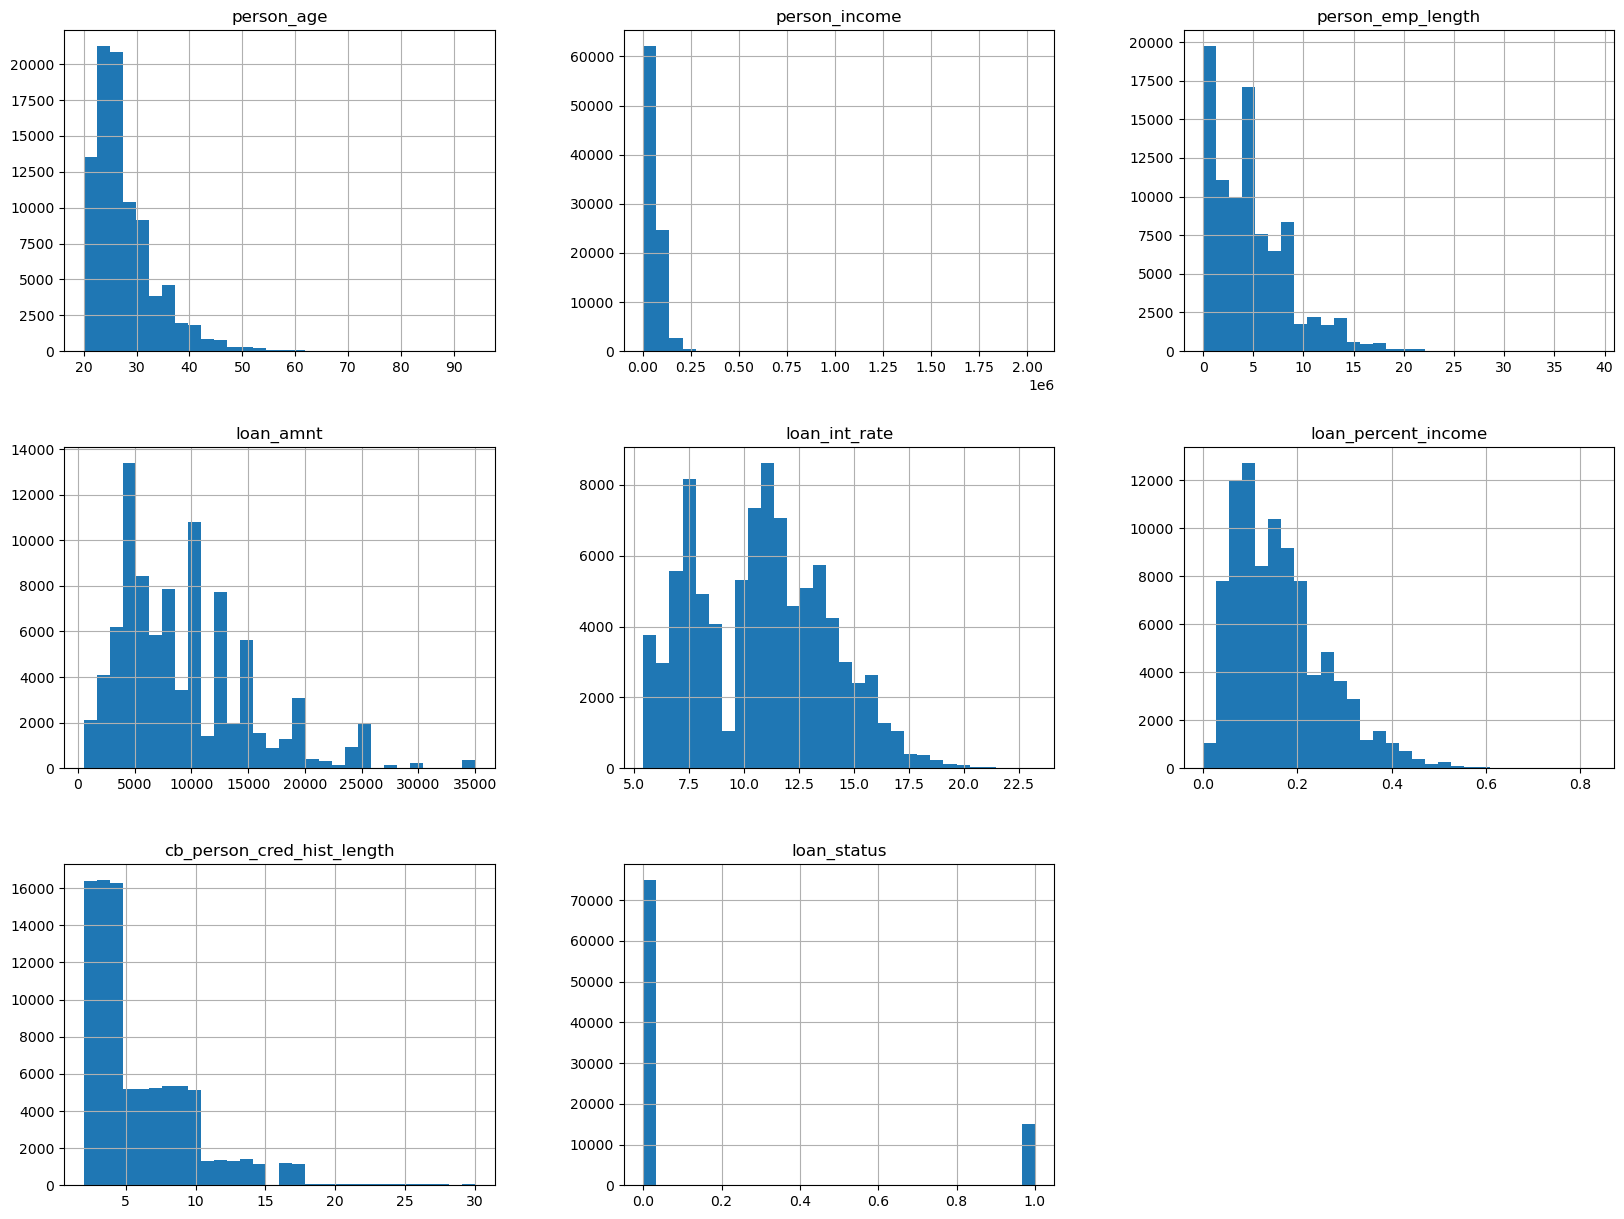

In [29]:
# distribution of numeric features
train_df.hist(bins=30,figsize=(20, 15))
plt.show()

The histograms show the distribution of various financial and personal attributes in your dataset. Here are the insights from each histogram:

**1. Person Age**
- Most ages are between 20 and 40 years, with outliers above 60 and one extreme outlier at 123 years.

**2. Person Income**
- Most individuals earn between $0 and $100,000, with significant outliers exceeding $200,000.

**3. Person Employment Length**
- Employment length is concentrated around 0 to 10 years, with outliers exceeding 30 years and one extreme outlier at 123 years.

**4. Loan Amount**
- Most loan amounts are between $0 and $20,000, with outliers exceeding $30,000.

**5. Loan Interest Rate**
- Interest rates are mostly between 5% and 15%, with outliers exceeding 20%.

**6. Loan Percent Income**
- The loan percentage of income is mostly between 0% and 0.3%, with outliers exceeding 0.5%.

**7. Credit History Length (cb_person_cred_hist_length)**
-  Distribution: The majority of individuals have a credit history length of 0 to 5 years, with the highest frequency at 0 years. The frequency decreases as the credit history length increases.-   Implication: This suggests that many individuals in the dataset are either new to credit or have very short credit histories. This could impact their loan approval chances, as shorter credit histories might be associated with higher risk.

**8. Loan Status (loan_status)**
-    Distribution: The vast majority of loans have a status of 0 (likely indicating not approved), with a very small number having a status of 1 (likely indicating apped)v-- 
   Implication: This indicates that most loan applications in the dataset are not approved. This could be due to various factors such as poor credit history, insufficient income, or other risk factors.

**<ins> Key Takeaways:</ins>**
- Presence of extreme outliers in age and employment length suggests potential data entry errors.
- Right-skewed distributions indicate moderate incomes and loan amounts for most, but some with very high values.
- Most loans take up a small percentage of the applicant’s income, suggesting affordability for most appli
- Credit History: The predominance of short credit histories suggests that many applicants might be new to credit, which could be a significant factor in loan approval decisions.
- Loan Approval Rate: The low approval rate indicates that the criteria for loan approval are stringent, or that many applicants do not meet the necessary requirements.

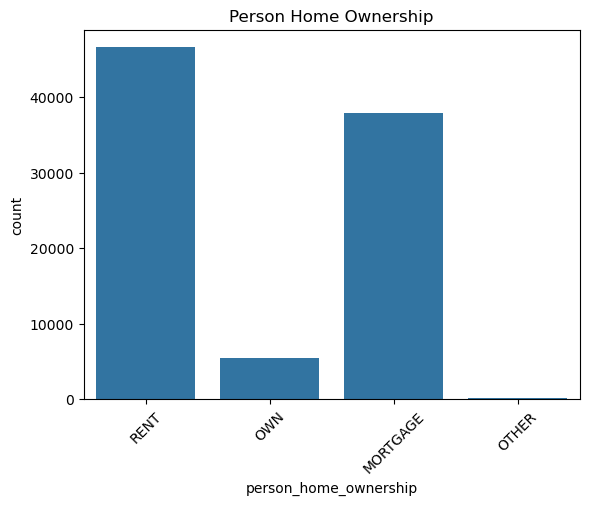

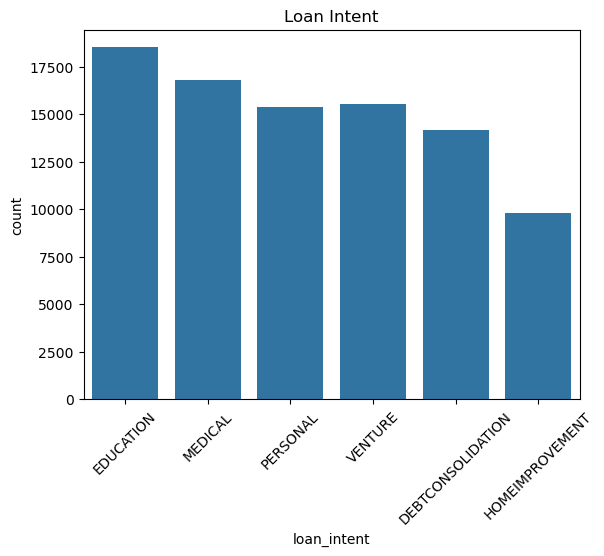

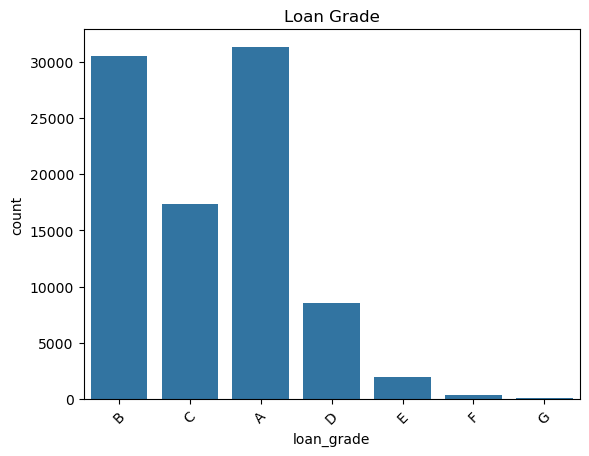

In [30]:
# Count plot for person_home_ownership
sns.countplot(x='person_home_ownership', data=train_df)
plt.title('Person Home Ownership')
plt.xticks(rotation=45)
plt.show()

# Count plot for loan_intent
sns.countplot(x='loan_intent', data=train_df)
plt.title('Loan Intent')
plt.xticks(rotation=45)
plt.show()

# Count plot for loan_grade
sns.countplot(x='loan_grade', data=train_df)
plt.title('Loan Grade')
plt.xticks(rotation=45)
plt.show()

**<ins> key observations:</ins>**
1. Renting is the most common form of home ownership.
2. Debt consolidation is the primary reason for loan applications.
3. Grade B loans are the most common.

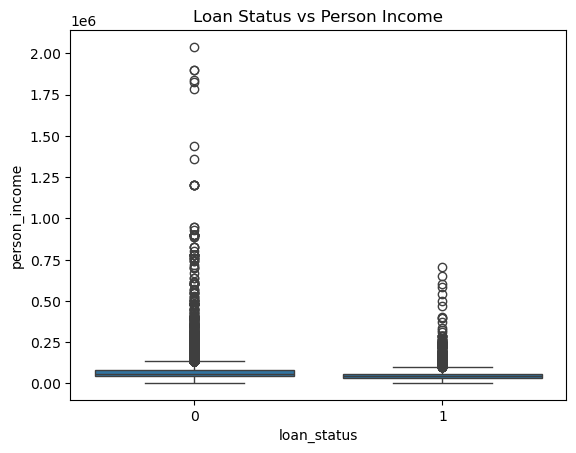

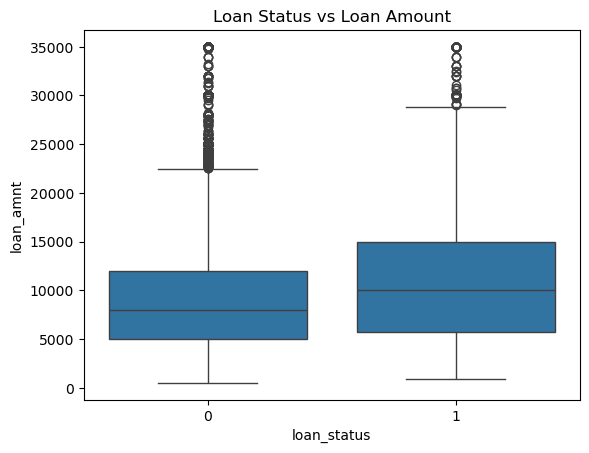

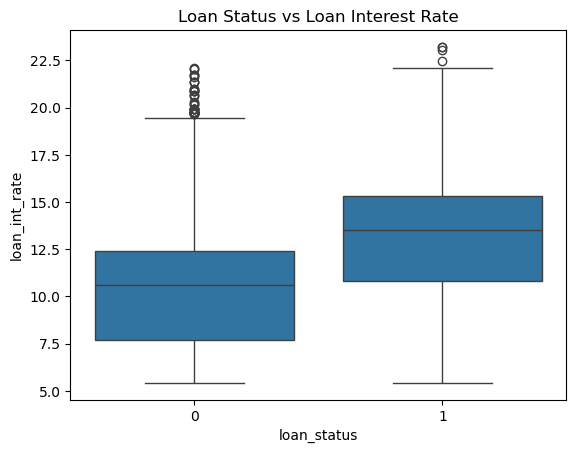

In [31]:
# Relationship between loan_status and person_income
sns.boxplot(x='loan_status', y='person_income', data=train_df)
plt.title('Loan Status vs Person Income')
plt.show()

# Relationship between loan_status and loan_amnt
sns.boxplot(x='loan_status', y='loan_amnt', data=train_df)
plt.title('Loan Status vs Loan Amount')
plt.show()

# Relationship between loan_status and loan_int_rate
sns.boxplot(x='loan_status', y='loan_int_rate', data=train_df)
plt.title('Loan Status vs Loan Interest Rate')
plt.show()

**<ins>Key points:</ins>**

Income Distribution:
- Most loan applicants have lower incomes.
- Some higher-income outliers exist.
- Compare median incomes and interquartile ranges for different loan statuses to determine significant differences.

Median Loan Amounts:
- The typical loan amount is similar for both loan statuses.
- Both statuses show a comparable range of loan amounts with some outliers.

Median Interest Rates:
- Loans with status '1' have higher interest rates compared to status '0'.
- Both categories show variability in interest rates, with wider spread for loans with status '1' and some outliers with significantly higher rates.

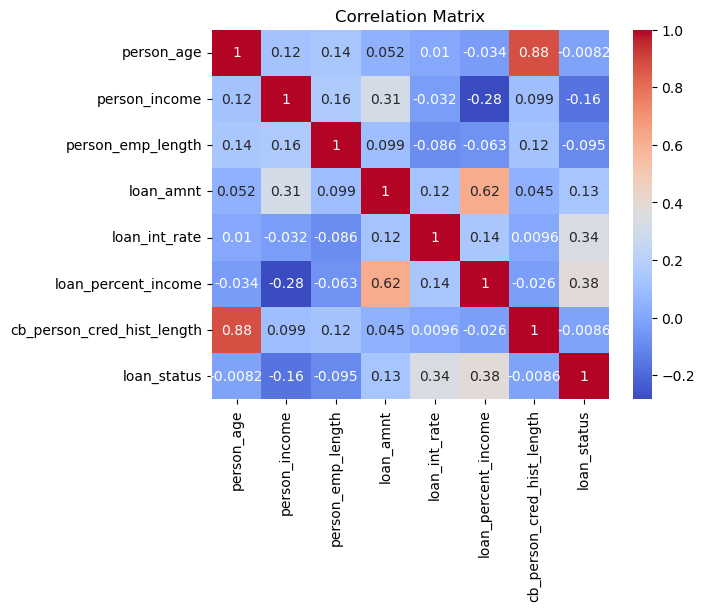

In [32]:
# Correlation matrix
numeric_col=train_df.select_dtypes(include=np.number)
corr_matrix =numeric_col.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### build model

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [34]:
 # Split features and target
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Split the dataset into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Define models to evaluate
models = {
       'Random Forest':RandomForestClassifier(random_state=42),
    'Logistic Regression':LogisticRegression(max_iter=200,random_state=42),
    'XGBoost classifier':XGBClassifier(random_state=42),
    'Light Gradient Boosting':LGBMClassifier(random_state=42),
    'catboost classifier':CatBoostClassifier(random_state=42, verbose=0),
    'AdaBoost  classifier':AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Bagging with XGBoost': BaggingClassifier(estimator=XGBClassifier(random_state=42), n_estimators=10, random_state=42)
    }

# Store results
results = []

for model_name, model in models.items():
    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
            ]
        )

    # Create a pipeline
    pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

   # Perform cross-validation to get ROC AUC score
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')

    # Store the results
    results.append({'Model': model_name, 'ROC AUC Mean': np.mean(scores), 'ROC AUC Std': np.std(scores)})

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Find the best model based on ROC AUC
best_model_row = results_df.loc[results_df['ROC AUC Mean'].idxmax()]
best_model_name = best_model_row['Model']
best_model_score = best_model_row['ROC AUC Mean']

# Retrain the best model on the full training data
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', best_model)
    ])
best_pipeline.fit(X, y)

print(f'Best Model: {best_model_name} with ROC AUC: {best_model_score:.2f}')

best_pipeline, best_model_score, results_df


In [ ]:
results_df.sort_values(by='ROC AUC Mean',ascending=False).reset_index()

In [ ]:
# Predict probabilities on the validation set
y_pred_proba_valid = best_pipeline.predict_proba(X_valid)[:, 1]

# Calculate AUC-ROC for the validation set
roc_auc_valid = roc_auc_score(y_valid, y_pred_proba_valid)
print(f'AUC-ROC (Validation) for Best Classifier after Tuning: {roc_auc_valid:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_valid)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Define hyperparameter grid
param_grid = {
      'classifier__n_estimators': [100, 150, 200],
    
    }
# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(best_pipeline , param_grid, cv=5, scoring='roc_auc', n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')


In [ ]:
# Transform the test data using the same pipeline
test_df_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(test_df)

# Predict probabilities on the test set
test_probabilities = grid_search.best_estimator_.named_steps['classifier'].predict_proba(test_df_transformed)[:, 1]
predictions=grid_search.best_estimator_.named_steps['classifier'].predict(test_df_transformed)

In [ ]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],  
    'loan_status': test_probabilities
})

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
import joblib
joblib.dump(best_model,'model.pkl')